In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
df_org = pd.read_csv(r"./clean_kaggle_data_2020.csv")
df_org

C:\Users\georg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,206) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",NaN,NaN
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1.0,"10,000-19,999"
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,"125,000-149,9991"
4,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,"70,000-79,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,2104,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,Python,NaN,NaN,...,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN,0.0,"0-9,999"
10726,5461,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1.0,"10,000-19,999"
10727,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
10728,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN,0.0,"0-9,999"


In [3]:
df = df_org.drop(index = 0)
df = df.drop(columns = ["Time from Start to Finish (seconds)","Q24","Q24_Encoded","Q24_buckets"])

df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pd.DataFrame(df.isna().sum(),columns = ["num_of_NAN_values"]))


               num_of_NAN_values
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7_Part_1                   2009
Q7_Part_2                   7974
Q7_Part_3                   5749
Q7_Part_4                   9329
Q7_Part_5                   9037
Q7_Part_6                   8980
Q7_Part_7                   8901
Q7_Part_8                  10555
Q7_Part_9                  10600
Q7_Part_10                  9370
Q7_Part_11                  9623
Q7_Part_12                 10626
Q7_OTHER                    9327
Q8                           561
Q9_Part_1                   4289
Q9_Part_2                   8249
Q9_Part_3                   9301
Q9_Part_4                   7288
Q9_Part_5                   7742
Q9_Part_6                   8827
Q9_Part_7                   8611
Q9_Part_8                   9398
Q9_Part_9                   9634
Q9_Part_10

In [5]:
#investigation on if NAN from Q8, Q11, Q13, and Q15 are from the same participants
df[df["Q8"].isna()].index.any() == df[df["Q11"].isna()].index.any() == df[df["Q13"].isna()].index.any() == df[df["Q15"].isna()].index.any()

True

In [6]:
#investigation on what question these participant did not answer until
df.loc[df[df["Q8"].isna()].index].iloc[:,6:107].isna().all().all()


False

In [7]:
df.iloc[:,106]
#They did not answer a single question from Q7 until Q20

1        10,000 or more employees
2            1000-9,999 employees
3               250-999 employees
4            1000-9,999 employees
5                  0-49 employees
                   ...           
10725              0-49 employees
10726           250-999 employees
10727              0-49 employees
10728    10,000 or more employees
10729              0-49 employees
Name: Q20, Length: 10729, dtype: object

In [8]:
#drop these participants
index = df[df["Q8"].isna()].index
df1 = df.drop(index = index)
df1.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pd.DataFrame(df1.isna().sum(),columns = ["num_of_NAN_values"]))
#as can be seen, Q8, Q11,Q13,and Q15 now has 0 NAN values

               num_of_NAN_values
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7_Part_1                   1448
Q7_Part_2                   7413
Q7_Part_3                   5188
Q7_Part_4                   8768
Q7_Part_5                   8476
Q7_Part_6                   8419
Q7_Part_7                   8340
Q7_Part_8                   9994
Q7_Part_9                  10039
Q7_Part_10                  8809
Q7_Part_11                  9062
Q7_Part_12                 10065
Q7_OTHER                    8766
Q8                             0
Q9_Part_1                   3728
Q9_Part_2                   7688
Q9_Part_3                   8740
Q9_Part_4                   6727
Q9_Part_5                   7181
Q9_Part_6                   8266
Q9_Part_7                   8050
Q9_Part_8                   8837
Q9_Part_9                   9073
Q9_Part_10

In [10]:
df1[df1["Q25"].isna()].groupby(by = "Q15").agg(num_of_participants = pd.NamedAgg(column="Q15", aggfunc="count"))
#as can be seen, almost all participants that entered NAN in Q25 have less than 5 years of ML exp in Q15
#fill NAN with 0

,num_of_participants
Q15,
1-2 years,24
10-20 years,2
2-3 years,16
20 or more years,2
3-4 years,5
4-5 years,4
5-10 years,5
I do not use machine learning methods,28
Under 1 year,48


In [11]:
df1["Q25"].mode()
#mode for Q25 also supports this 

0    $0 ($USD)
dtype: object

In [12]:
df1["Q25"] = df1["Q25"].fillna("$0 ($USD)")
df1["Q25"].unique()
#no NAN in Q25 now

array(['$100,000 or more ($USD)', '$0 ($USD)', '$10,000-$99,999',
       '$1-$99', '$1000-$9,999', '$100-$999'], dtype=object)

In [13]:
#drop Q30 and Q32 directly
df1 = df1.drop(columns = ["Q30", "Q32"])


In [14]:
df1[df1["Q38"].isna()].groupby(by = "Q11").agg(num_of_participants = pd.NamedAgg(column="Q11", aggfunc="count"))

,num_of_participants
Q11,
"A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)",141
"A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)",53
A personal computer or laptop,794
None,34
Other,6


In [15]:
df1[df1["Q11"] == "A personal computer or laptop"].groupby(by = "Q38").agg(num_of_participants = pd.NamedAgg(column="Q11", aggfunc="count"))
#mode for Q38 given that they use A personal computer or laptop for ds projects is Local development environments (3149)

,num_of_participants
Q38,
"Advanced statistical software (SPSS, SAS, etc.)",477
"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",2149
"Business intelligence software (Salesforce, Tableau, Spotfire, etc.)",515
"Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",183
"Local development environments (RStudio, JupyterLab, etc.)",3149
Other,330


In [16]:
df1["Q38"] = df1["Q38"].fillna("Local development environments (RStudio, JupyterLab, etc.)")
df1["Q38"].unique()
#no nan values in Q38

array(['Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
       'Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
       'Local development environments (RStudio, JupyterLab, etc.)',
       'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)',
       'Advanced statistical software (SPSS, SAS, etc.)', 'Other'],
      dtype=object)

In [17]:
df1["Q38"].mode()

0    Local development environments (RStudio, Jupyt...
dtype: object

In [18]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pd.DataFrame(df1.isna().sum(),columns = ["num_of_NAN_values"]))
#all other than question with parts have 0 nan values 

               num_of_NAN_values
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7_Part_1                   1448
Q7_Part_2                   7413
Q7_Part_3                   5188
Q7_Part_4                   8768
Q7_Part_5                   8476
Q7_Part_6                   8419
Q7_Part_7                   8340
Q7_Part_8                   9994
Q7_Part_9                  10039
Q7_Part_10                  8809
Q7_Part_11                  9062
Q7_Part_12                 10065
Q7_OTHER                    8766
Q8                             0
Q9_Part_1                   3728
Q9_Part_2                   7688
Q9_Part_3                   8740
Q9_Part_4                   6727
Q9_Part_5                   7181
Q9_Part_6                   8266
Q9_Part_7                   8050
Q9_Part_8                   8837
Q9_Part_9                   9073
Q9_Part_10

In [19]:
#fill nan in questions with parts with 0
df1 = df1.fillna("no_value")
df1

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,no_value,...,no_value,no_value,no_value,no_value,no_value,no_value,no_value,no_value,no_value,no_value
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,no_value,no_value,no_value,no_value,...,no_value,no_value,no_value,no_value,no_value,no_value,no_value,no_value,None,no_value
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,no_value,SQL,no_value,...,no_value,no_value,no_value,no_value,no_value,no_value,no_value,no_value,no_value,no_value
4,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,no_value,SQL,no_value,...,no_value,no_value,no_value,no_value,no_value,no_value,no_value,no_value,no_value,no_value
5,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,no_value,R,no_value,no_value,...,no_value,no_value,no_value,no_value,no_value,no_value,no_value,no_value,no_value,no_value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,Python,no_value,no_value,no_value,...,no_value,no_value,no_value,TensorBoard,no_value,no_value,Trains,no_value,no_value,no_value
10726,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,no_value,no_value,SQL,C,...,no_value,no_value,no_value,no_value,no_value,no_value,no_value,no_value,None,no_value
10727,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,no_value,no_value,no_value,...,no_value,no_value,no_value,no_value,no_value,no_value,no_value,no_value,no_value,no_value
10728,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,no_value,SQL,C,...,Weights & Biases,no_value,no_value,TensorBoard,no_value,no_value,Trains,no_value,no_value,no_value


In [20]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(pd.DataFrame(df1.isna().sum(),columns = ["num_of_NAN_values"]))
#all NAN values are filled 

               num_of_NAN_values
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7_Part_1                      0
Q7_Part_2                      0
Q7_Part_3                      0
Q7_Part_4                      0
Q7_Part_5                      0
Q7_Part_6                      0
Q7_Part_7                      0
Q7_Part_8                      0
Q7_Part_9                      0
Q7_Part_10                     0
Q7_Part_11                     0
Q7_Part_12                     0
Q7_OTHER                       0
Q8                             0
Q9_Part_1                      0
Q9_Part_2                      0
Q9_Part_3                      0
Q9_Part_4                      0
Q9_Part_5                      0
Q9_Part_6                      0
Q9_Part_7                      0
Q9_Part_8                      0
Q9_Part_9                      0
Q9_Part_10

In [21]:
#get dummy variables 
df2 = pd.get_dummies(df1, drop_first = True)
df2

,Q1_22-24,Q1_25-29,Q1_30-34,Q1_35-39,Q1_40-44,Q1_45-49,Q1_50-54,Q1_55-59,Q1_60-69,Q1_70+,...,Q35_B_Part_2_no_value,Q35_B_Part_3_no_value,Q35_B_Part_4_no_value,Q35_B_Part_5_no_value,Q35_B_Part_6_no_value,Q35_B_Part_7_no_value,Q35_B_Part_8_no_value,Q35_B_Part_9_no_value,Q35_B_Part_10_no_value,Q35_B_OTHER_no_value
1,0,0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1
3,0,0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5,0,0,0,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,0,0,0,1,0,0,0,0,0,0,...,1,1,1,0,1,1,0,1,1,1
10726,0,0,0,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1
10727,0,0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
10728,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,1,1,1


In [22]:
# part 2
#train, vali, test split
X = df2
y = df_org["Q24_Encoded"].drop(index =0).drop(index = index)
X_train_vali, X_test, y_train_vali, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

X_train_vali.shape, y_train_vali.shape

((7117, 478), (7117,))

In [23]:
reg = RandomForestRegressor()
reg.fit(X_train_vali, y_train_vali)

RandomForestRegressor()

In [24]:
#df for the most importannt 15 features.
df_feature_importance = pd.DataFrame(reg.feature_importances_, index=X.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)

#ind_list = df_feature_importance.index.tolist()

#idx1 = ind_list.index('Q3_United Kingdom of Great Britain and Northern Ireland')
#ind_list[idx1] = 'Q3_UK'
#idx2 = ind_list.index('Q22_We have well established ML methods (i.e., models in production for more than 2 years)')
#ind_list[idx2] = 'Q22_well established'
#idx3 = ind_list.index('Q3_United States of America')
#ind_list[idx3] = 'Q3_USA'
#df_feature_importance.index = ind_list

df_feature_importance.iloc[0:15,:]


,feature importance
Q3_United States of America,0.273270
"Q25_$100,000 or more ($USD)",0.036353
"Q25_$10,000-$99,999",0.031324
Q6_20+ years,0.020963
Q1_22-24,0.017472
Q6_10-20 years,0.015640
Q3_United Kingdom of Great Britain and Northern Ireland,0.014433
Q23_Part_3_no_value,0.013037
"Q22_We have well established ML methods (i.e., models in production for more than 2 years)",0.012398
Q3_Canada,0.011965


<AxesSubplot:>

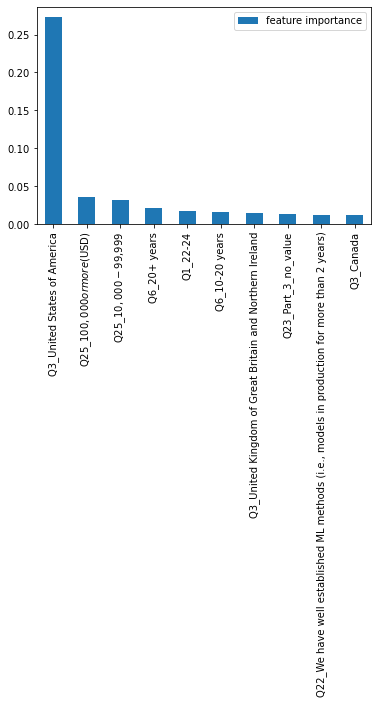

In [25]:
df_feature_importance.iloc[0:10,:].plot(kind='bar')

In [26]:
#select features that has importance over 0.005
imp_feature = df_feature_importance[df_feature_importance["feature importance"] >= 0.005].index
df2[imp_feature].shape

(10168, 20)

In [27]:
X = df2[imp_feature]
y = df_org["Q24_Encoded"].drop(index =0).drop(index = index)
X_train_vali, X_test, y_train_vali, y_test = train_test_split(X, y, random_state=0, test_size=0.3)


In [28]:
#part 3
import warnings
warnings.filterwarnings("ignore")
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train_vali)


10

In [29]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train_vali)
df_prob_list = []

for train_idx, vali_idx in kfold.split(X_train_vali):
    X_train, X_vali = X_train_vali.values[train_idx], X_train_vali.values[vali_idx]
    y_train, y_vali = y_train_vali.values[train_idx], y_train_vali.values[vali_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_vali = scaler.transform(X_vali)
    
    prob_df = pd.DataFrame()
    prob_cum = pd.DataFrame()
    for i in range(0,14): #13 binary classifiers
        
        #make binary target 
        binary_target = []
        for element in y_train:
            if element in range(0,i+1):
                binary_target.append(0)
            else:
                binary_target.append(1)

        model.fit(X_train, binary_target)
        prob = model.predict_proba(X_vali)
        
        
        prob_cum[i] = prob[:,0]
        prob_cum[i+1] = prob[:,1]
    #prob_cum = prob_cum.set_index(X_train_vali.index[vali_idx])
    #now we have prob_cum
    
    for i in prob_cum.columns:
        if i == 0:
            prob_df[i] = prob_cum[i]
        elif i == 14:
            prob_df[i] = prob_cum[i]
        else:
            prob_df[i] =prob_cum[i] - prob_cum[i-1]
    #now we have prob_df with no other columns
    
    prob_df = prob_df.set_index(X_train_vali.index[vali_idx])
    prob_df["max"] = prob_df.max(axis = 1)
    
    salary_bucket = {0: '0-9,999', 1: '10,000-19,999' , 2: '100,000-124,999', 3: '125,000-149,9991',
                     4: '150,000-199,999', 5: '20,000-29,999', 6: '200,000-249,999',
                     7: '30,000-39,999', 8: '40,000-49,999', 9: '50,000-59,999', 10: '60,000-69,999',
                    11: '70,000-79,999', 12: '80,000-89,999', 13: '90,000-99,999', 14: '>250,000'}
    prob_df['pred_encoded'] = prob_df.apply(lambda x: prob_df.columns[x.argmax()], axis = 1)
    prob_df["pred_buckets"] = prob_df['pred_encoded'].map(salary_bucket)
    #now we have prob_df with additional columns
    
    df_prob_list.append(prob_df)   

prob_df = pd.concat(df_prob_list)
#now we have full prob_df with 7117 rows and other columns

prob_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,max,pred_encoded,pred_buckets
7641,0.902364,0.054590,0.018768,0.007710,0.004023,0.003859,0.002007,0.000765,0.001433,0.000645,0.001458,0.000261,-0.000715,-0.000799,0.003632,0.902364,0,"0-9,999"
4867,0.605945,0.115614,0.070649,0.058969,0.050795,0.031614,0.020826,0.013756,0.007804,0.002822,0.012727,0.002997,0.002834,0.000148,0.002500,0.605945,0,"0-9,999"
5114,0.605945,0.115614,0.070649,0.058969,0.050795,0.031614,0.020826,0.013756,0.007804,0.002822,0.012727,0.002997,0.002834,0.000148,0.002500,0.605945,0,"0-9,999"
3787,0.605945,0.115614,0.070649,0.058969,0.050795,0.031614,0.020826,0.013756,0.007804,0.002822,0.012727,0.002997,0.002834,0.000148,0.002500,0.605945,0,"0-9,999"
6210,0.042337,0.008396,0.023435,0.052440,0.085323,0.117967,0.134428,0.101055,0.048648,0.122640,0.090648,0.072350,0.080557,0.010664,0.009113,0.134428,6,"200,000-249,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9735,0.613465,0.128884,0.076971,0.054234,0.044444,0.034229,0.009743,0.011158,0.008804,0.004286,0.005091,0.002778,-0.000530,-0.001584,0.008026,0.613465,0,"0-9,999"
5134,0.804575,0.068720,0.042858,0.030385,0.018187,0.014549,0.005325,0.003786,0.003660,0.000481,0.003862,0.001016,0.000628,0.000495,0.001475,0.804575,0,"0-9,999"
3454,0.063765,0.010202,0.012848,0.004653,0.016852,0.024673,0.030227,0.056293,0.026519,0.108130,0.208086,0.129703,0.220816,0.041657,0.045577,0.220816,12,"80,000-89,999"
10389,0.525249,0.118289,0.078077,0.076225,0.058792,0.047968,0.028440,0.018205,0.013418,0.004106,0.018716,0.005175,0.004626,0.001131,0.001584,0.525249,0,"0-9,999"


In [30]:
#without hyperparameter tunning

model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train_vali)
df_prob_list = []

best_model = model
best_params = {}
best_f1_score = 0

for C in [1]:
    for solver in ['newton-cg']:
        
        model = LogisticRegression(C=C, solver=solver)
        acc_list = []
        #list_idx = 0
        fold_count = 1

        for train_idx, vali_idx in kfold.split(X_train_vali):
            X_train, X_vali = X_train_vali.values[train_idx], X_train_vali.values[vali_idx]
            y_train, y_vali = y_train_vali.values[train_idx], y_train_vali.values[vali_idx]

            X_train = scaler.fit_transform(X_train)
            X_vali = scaler.transform(X_vali)

            prob_df = pd.DataFrame()
            prob_cum = pd.DataFrame()
            for i in range(0,14): #13 binary classifiers

                #make binary target 
                binary_target = []
                for element in y_train:
                    if element in range(0,i+1):
                        binary_target.append(0)
                    else:
                        binary_target.append(1)

                model.fit(X_train, binary_target)
                prob = model.predict_proba(X_vali)


                prob_cum[i] = prob[:,0]
                prob_cum[i+1] = prob[:,1]
            #now we have prob_cum

            for i in prob_cum.columns:
                if i == 0:
                    prob_df[i] = prob_cum[i]
                elif i == 14:
                    prob_df[i] = prob_cum[i]
                else:
                    prob_df[i] =prob_cum[i] - prob_cum[i-1]
            #now we have prob_df with no other columns

            prob_df = prob_df.set_index(X_train_vali.index[vali_idx])
            prob_df["max"] = prob_df.max(axis = 1)

            salary_bucket = {0: '0-9,999', 1: '10,000-19,999' , 2: '100,000-124,999', 3: '125,000-149,9991',
                             4: '150,000-199,999', 5: '20,000-29,999', 6: '200,000-249,999',
                             7: '30,000-39,999', 8: '40,000-49,999', 9: '50,000-59,999', 10: '60,000-69,999',
                            11: '70,000-79,999', 12: '80,000-89,999', 13: '90,000-99,999', 14: '>250,000'}
            prob_df['pred_encoded'] = prob_df.apply(lambda x: prob_df.columns[x.argmax()], axis = 1)
            prob_df["pred_buckets"] = prob_df['pred_encoded'].map(salary_bucket)
            #now we have prob_df with additional columns

            prob_df["true_encoded"] = df_org["Q24_Encoded"].drop(index = 0).loc[X_train_vali.index[vali_idx]]
            
            acc = accuracy_score(prob_df["true_encoded"], prob_df['pred_encoded'])
            
            #score = round(f1_score(prob_df["true_encoded"], prob_df['pred_encoded'], average='micro'), 3)
            #add a column contraining true values from original Q24_encoded and compare with pred_encoded using F1score
            print("Accuracy for fold %i, C: %f and solver: %s is %f" %(fold_count, C, solver, round(acc, 3)))

            acc_list.append(acc)

            df_prob_list.append(prob_df)  
            fold_count += 1
        #print("Mean Accuracy for this iteration is:",round(np.mean(acc_list),3))
        print ("Average Score: {}({})".format(round(np.mean(acc_list),3),round(np.var(acc_list),3)))
        print("----------------------------------------------------------")
        prob_df = pd.concat(df_prob_list)
        #now we have full prob_df with 7117 rows and other columns
        
        
#prob_df

Accuracy for fold 1, C: 1.000000 and solver: newton-cg is 0.390000
Accuracy for fold 2, C: 1.000000 and solver: newton-cg is 0.412000
Accuracy for fold 3, C: 1.000000 and solver: newton-cg is 0.444000
Accuracy for fold 4, C: 1.000000 and solver: newton-cg is 0.421000
Accuracy for fold 5, C: 1.000000 and solver: newton-cg is 0.454000
Accuracy for fold 6, C: 1.000000 and solver: newton-cg is 0.437000
Accuracy for fold 7, C: 1.000000 and solver: newton-cg is 0.458000
Accuracy for fold 8, C: 1.000000 and solver: newton-cg is 0.432000
Accuracy for fold 9, C: 1.000000 and solver: newton-cg is 0.460000
Accuracy for fold 10, C: 1.000000 and solver: newton-cg is 0.402000
Average Score: 0.431(0.001)
----------------------------------------------------------


In [31]:
prob_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,max,pred_encoded,pred_buckets,true_encoded
7641,0.902365,0.054587,0.018771,0.007712,0.004021,0.003859,0.002008,0.000764,0.001433,0.000645,0.001458,0.000260,-0.000715,-0.000799,0.003632,0.902365,0,"0-9,999",0.0
4867,0.605946,0.115611,0.070655,0.058965,0.050794,0.031615,0.020827,0.013755,0.007804,0.002821,0.012727,0.002997,0.002835,0.000148,0.002500,0.605946,0,"0-9,999",0.0
5114,0.605946,0.115611,0.070655,0.058965,0.050794,0.031615,0.020827,0.013755,0.007804,0.002821,0.012727,0.002997,0.002835,0.000148,0.002500,0.605946,0,"0-9,999",6.0
3787,0.605946,0.115611,0.070655,0.058965,0.050794,0.031615,0.020827,0.013755,0.007804,0.002821,0.012727,0.002997,0.002835,0.000148,0.002500,0.605946,0,"0-9,999",0.0
6210,0.042335,0.008399,0.023436,0.052440,0.085310,0.117984,0.134434,0.101047,0.048648,0.122637,0.090650,0.072353,0.080551,0.010664,0.009113,0.134434,6,"200,000-249,999",12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9735,0.613465,0.128886,0.076966,0.054240,0.044442,0.034231,0.009748,0.011154,0.008800,0.004286,0.005093,0.002777,-0.000529,-0.001583,0.008024,0.613465,0,"0-9,999",0.0
5134,0.804577,0.068719,0.042855,0.030388,0.018186,0.014549,0.005326,0.003785,0.003659,0.000481,0.003863,0.001016,0.000629,0.000494,0.001474,0.804577,0,"0-9,999",1.0
3454,0.063763,0.010203,0.012846,0.004654,0.016854,0.024673,0.030228,0.056301,0.026515,0.108145,0.208073,0.129693,0.220810,0.041662,0.045580,0.220810,12,"80,000-89,999",12.0
10389,0.525256,0.118280,0.078079,0.076223,0.058793,0.047968,0.028441,0.018205,0.013415,0.004105,0.018718,0.005179,0.004624,0.001131,0.001583,0.525256,0,"0-9,999",3.0


In [32]:
#with hyperparameter tunning

model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train_vali)
df_prob_list = []

best_model = model
best_params = {}
best_f1_score = 0

for C in [0.01, 0.1, 1, 5, 10, 100]:
    for solver in ['newton-cg','liblinear','sag']:
        
        model = LogisticRegression(C=C, solver=solver)
        f1_score_list = []
        #list_idx = 0
        fold_count = 1

        for train_idx, vali_idx in kfold.split(X_train_vali):
            X_train, X_vali = X_train_vali.values[train_idx], X_train_vali.values[vali_idx]
            y_train, y_vali = y_train_vali.values[train_idx], y_train_vali.values[vali_idx]

            X_train = scaler.fit_transform(X_train)
            X_vali = scaler.transform(X_vali)

            prob_df = pd.DataFrame()
            prob_cum = pd.DataFrame()
            for i in range(0,14): #13 binary classifiers

                #make binary target 
                binary_target = []
                for element in y_train:
                    if element in range(0,i+1):
                        binary_target.append(0)
                    else:
                        binary_target.append(1)

                model.fit(X_train, binary_target)
                prob = model.predict_proba(X_vali)


                prob_cum[i] = prob[:,0]
                prob_cum[i+1] = prob[:,1]
            #now we have prob_cum

            for i in prob_cum.columns:
                if i == 0:
                    prob_df[i] = prob_cum[i]
                elif i == 14:
                    prob_df[i] = prob_cum[i]
                else:
                    prob_df[i] =prob_cum[i] - prob_cum[i-1]
            #now we have prob_df with no other columns

            prob_df = prob_df.set_index(X_train_vali.index[vali_idx])
            prob_df["max"] = prob_df.max(axis = 1)

            salary_bucket = {0: '0-9,999', 1: '10,000-19,999' , 2: '100,000-124,999', 3: '125,000-149,9991',
                             4: '150,000-199,999', 5: '20,000-29,999', 6: '200,000-249,999',
                             7: '30,000-39,999', 8: '40,000-49,999', 9: '50,000-59,999', 10: '60,000-69,999',
                            11: '70,000-79,999', 12: '80,000-89,999', 13: '90,000-99,999', 14: '>250,000'}
            prob_df['pred_encoded'] = prob_df.apply(lambda x: prob_df.columns[x.argmax()], axis = 1)
            prob_df["pred_buckets"] = prob_df['pred_encoded'].map(salary_bucket)
            #now we have prob_df with additional columns

            prob_df["true_encoded"] = df_org["Q24_Encoded"].drop(index = 0).loc[X_train_vali.index[vali_idx]]
            score = round(f1_score(prob_df["true_encoded"], prob_df['pred_encoded'], average='micro'), 3)
            #add a column contraining true values from original Q24_encoded and compare with pred_encoded using F1score
            print("F1 score for fold %i, C: %f and solver: %s is %f" %(fold_count, C, solver, score))

            f1_score_list.append(score)

            df_prob_list.append(prob_df)  
            fold_count += 1
        #print("Mean F1 score for this iteration is:",round(np.mean(f1_score_list),5))
        print ("Average Score: {}({})".format(round(np.mean(f1_score_list),4),round(np.var(f1_score_list),5)))
        print("----------------------------------------------------------")
        prob_df = pd.concat(df_prob_list)
        #now we have full prob_df with 7117 rows and other columns
        
        if np.mean(f1_score_list) > best_f1_score:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_f1_score = np.mean(f1_score_list)

print (best_params)
print ("Best F1 score:", round(best_f1_score,5))
       
#prob_df

F1 score for fold 1, C: 0.010000 and solver: newton-cg is 0.386000
F1 score for fold 2, C: 0.010000 and solver: newton-cg is 0.409000
F1 score for fold 3, C: 0.010000 and solver: newton-cg is 0.451000
F1 score for fold 4, C: 0.010000 and solver: newton-cg is 0.421000
F1 score for fold 5, C: 0.010000 and solver: newton-cg is 0.455000
F1 score for fold 6, C: 0.010000 and solver: newton-cg is 0.438000
F1 score for fold 7, C: 0.010000 and solver: newton-cg is 0.455000
F1 score for fold 8, C: 0.010000 and solver: newton-cg is 0.432000
F1 score for fold 9, C: 0.010000 and solver: newton-cg is 0.468000
F1 score for fold 10, C: 0.010000 and solver: newton-cg is 0.395000
Average Score: 0.431(0.00069)
----------------------------------------------------------
F1 score for fold 1, C: 0.010000 and solver: liblinear is 0.385000
F1 score for fold 2, C: 0.010000 and solver: liblinear is 0.412000
F1 score for fold 3, C: 0.010000 and solver: liblinear is 0.452000
F1 score for fold 4, C: 0.010000 and so

F1 score for fold 2, C: 5.000000 and solver: sag is 0.412000
F1 score for fold 3, C: 5.000000 and solver: sag is 0.444000
F1 score for fold 4, C: 5.000000 and solver: sag is 0.421000
F1 score for fold 5, C: 5.000000 and solver: sag is 0.454000
F1 score for fold 6, C: 5.000000 and solver: sag is 0.437000
F1 score for fold 7, C: 5.000000 and solver: sag is 0.458000
F1 score for fold 8, C: 5.000000 and solver: sag is 0.432000
F1 score for fold 9, C: 5.000000 and solver: sag is 0.460000
F1 score for fold 10, C: 5.000000 and solver: sag is 0.404000
Average Score: 0.4312(0.00052)
----------------------------------------------------------
F1 score for fold 1, C: 10.000000 and solver: newton-cg is 0.390000
F1 score for fold 2, C: 10.000000 and solver: newton-cg is 0.412000
F1 score for fold 3, C: 10.000000 and solver: newton-cg is 0.444000
F1 score for fold 4, C: 10.000000 and solver: newton-cg is 0.421000
F1 score for fold 5, C: 10.000000 and solver: newton-cg is 0.454000
F1 score for fold 6,

In [33]:
#make prob_df for the best hyperparameters

model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_train_vali)
df_prob_list = []

best_model = model
best_f1_score = 0

for C in [best_params["C"]]:
    for solver in [best_params["solver"]]:
        
        model = LogisticRegression(C=C, solver=solver)
        f1_score_list = []
        #list_idx = 0
        fold_count = 1

        for train_idx, vali_idx in kfold.split(X_train_vali):
            X_train, X_vali = X_train_vali.values[train_idx], X_train_vali.values[vali_idx]
            y_train, y_vali = y_train_vali.values[train_idx], y_train_vali.values[vali_idx]

            X_train = scaler.fit_transform(X_train)
            X_vali = scaler.transform(X_vali)

            prob_df = pd.DataFrame()
            prob_cum = pd.DataFrame()
            for i in range(0,14): #13 binary classifiers

                #make binary target 
                binary_target = []
                for element in y_train:
                    if element in range(0,i+1):
                        binary_target.append(0)
                    else:
                        binary_target.append(1)

                model.fit(X_train, binary_target)
                prob = model.predict_proba(X_vali)


                prob_cum[i] = prob[:,0]
                prob_cum[i+1] = prob[:,1]
            #now we have prob_cum

            for i in prob_cum.columns:
                if i == 0:
                    prob_df[i] = prob_cum[i]
                elif i == 14:
                    prob_df[i] = prob_cum[i]
                else:
                    prob_df[i] =prob_cum[i] - prob_cum[i-1]
            #now we have prob_df with no other columns

            prob_df = prob_df.set_index(X_train_vali.index[vali_idx])
            prob_df["max"] = prob_df.max(axis = 1)

            salary_bucket = {0: '0-9,999', 1: '10,000-19,999' , 2: '100,000-124,999', 3: '125,000-149,9991',
                             4: '150,000-199,999', 5: '20,000-29,999', 6: '200,000-249,999',
                             7: '30,000-39,999', 8: '40,000-49,999', 9: '50,000-59,999', 10: '60,000-69,999',
                            11: '70,000-79,999', 12: '80,000-89,999', 13: '90,000-99,999', 14: '>250,000'}
            prob_df['pred_encoded'] = prob_df.apply(lambda x: prob_df.columns[x.argmax()], axis = 1)
            prob_df["pred_buckets"] = prob_df['pred_encoded'].map(salary_bucket)
            #now we have prob_df with additional columns

            prob_df["true_encoded"] = df_org["Q24_Encoded"].drop(index = 0).loc[X_train_vali.index[vali_idx]]
            score = round(f1_score(prob_df["true_encoded"], prob_df['pred_encoded'], average='micro'), 3)
            #add a column contraining true values from original Q24_encoded and compare with pred_encoded using F1score
            print("F1 score for fold %i, C: %f and solver: %s is %f" %(fold_count, C, solver, score))

            f1_score_list.append(score)

            df_prob_list.append(prob_df)  
            fold_count += 1
        #print("Mean F1 score for this iteration is:",round(np.mean(f1_score_list),5))
        print ("Average Score: {}({})".format(round(np.mean(f1_score_list),4),round(np.var(f1_score_list),5)))
        print("----------------------------------------------------------")
        prob_df = pd.concat(df_prob_list)
        #now we have full prob_df with 7117 rows and other columns
        
#prob_df

F1 score for fold 1, C: 5.000000 and solver: newton-cg is 0.390000
F1 score for fold 2, C: 5.000000 and solver: newton-cg is 0.412000
F1 score for fold 3, C: 5.000000 and solver: newton-cg is 0.444000
F1 score for fold 4, C: 5.000000 and solver: newton-cg is 0.421000
F1 score for fold 5, C: 5.000000 and solver: newton-cg is 0.454000
F1 score for fold 6, C: 5.000000 and solver: newton-cg is 0.437000
F1 score for fold 7, C: 5.000000 and solver: newton-cg is 0.458000
F1 score for fold 8, C: 5.000000 and solver: newton-cg is 0.432000
F1 score for fold 9, C: 5.000000 and solver: newton-cg is 0.460000
F1 score for fold 10, C: 5.000000 and solver: newton-cg is 0.404000
Average Score: 0.4312(0.00052)
----------------------------------------------------------


In [34]:
prob_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,max,pred_encoded,pred_buckets,true_encoded
7641,0.902520,0.054544,0.018749,0.007702,0.004012,0.003850,0.002002,0.000759,0.001430,0.000644,0.001451,0.000258,-0.000749,-0.000823,0.003653,0.902520,0,"0-9,999",0.0
4867,0.606111,0.115606,0.070653,0.058973,0.050791,0.031607,0.020817,0.013733,0.007796,0.002798,0.012709,0.002983,0.002814,0.000154,0.002454,0.606111,0,"0-9,999",0.0
5114,0.606111,0.115606,0.070653,0.058973,0.050791,0.031607,0.020817,0.013733,0.007796,0.002798,0.012709,0.002983,0.002814,0.000154,0.002454,0.606111,0,"0-9,999",6.0
3787,0.606111,0.115606,0.070653,0.058973,0.050791,0.031607,0.020817,0.013733,0.007796,0.002798,0.012709,0.002983,0.002814,0.000154,0.002454,0.606111,0,"0-9,999",0.0
6210,0.042149,0.008364,0.023380,0.052325,0.085153,0.117833,0.134361,0.101055,0.048607,0.122874,0.090622,0.072537,0.080848,0.010719,0.009174,0.134361,6,"200,000-249,999",12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9735,0.613534,0.129020,0.077037,0.054274,0.044433,0.034203,0.009729,0.011111,0.008775,0.004258,0.005079,0.002754,-0.000559,-0.001578,0.007930,0.613534,0,"0-9,999",0.0
5134,0.804875,0.068693,0.042837,0.030360,0.018154,0.014518,0.005306,0.003763,0.003641,0.000478,0.003836,0.001007,0.000615,0.000496,0.001421,0.804875,0,"0-9,999",1.0
3454,0.063581,0.010179,0.012821,0.004624,0.016826,0.024627,0.030195,0.056298,0.026475,0.108240,0.208178,0.129663,0.221083,0.041604,0.045608,0.221083,12,"80,000-89,999",12.0
10389,0.525418,0.118269,0.078072,0.076249,0.058798,0.047981,0.028442,0.018183,0.013406,0.004079,0.018695,0.005155,0.004595,0.001125,0.001534,0.525418,0,"0-9,999",3.0


In [35]:
#part 5
model = LogisticRegression(C=best_params['C'],solver=best_params['solver'])
scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

prob_df_test = pd.DataFrame()
prob_cum_test = pd.DataFrame()
for i in range(0,14): #13 binary classifiers

    #make binary target 
    binary_target = []
    for element in y_train:
        if element in range(0,i+1):
            binary_target.append(0)
        else:
            binary_target.append(1)

    model.fit(X_train, binary_target)
    prob = model.predict_proba(X_test_std)


    prob_cum_test[i] = prob[:,0]
    prob_cum_test[i+1] = prob[:,1]
#now we have prob_cum_test

for i in prob_cum_test.columns:
    if i == 0:
        prob_df_test[i] = prob_cum_test[i]
    elif i == 14:
        prob_df_test[i] = prob_cum_test[i]
    else:
        prob_df_test[i] =prob_cum_test[i] - prob_cum_test[i-1]
#now we have prob_df_test with no other columns

prob_df_test = prob_df_test.set_index(X_test.index)
prob_df_test["max"] = prob_df_test.max(axis = 1)

salary_bucket = {0: '0-9,999', 1: '10,000-19,999' , 2: '100,000-124,999', 3: '125,000-149,9991',
                 4: '150,000-199,999', 5: '20,000-29,999', 6: '200,000-249,999',
                 7: '30,000-39,999', 8: '40,000-49,999', 9: '50,000-59,999', 10: '60,000-69,999',
                11: '70,000-79,999', 12: '80,000-89,999', 13: '90,000-99,999', 14: '>250,000'}
prob_df_test['pred_encoded'] = prob_df_test.apply(lambda x: prob_df_test.columns[x.argmax()], axis = 1)
prob_df_test["pred_buckets"] = prob_df_test['pred_encoded'].map(salary_bucket)
#now we have prob_df_test with additional columns

prob_df_test["true_encoded"] = df_org["Q24_Encoded"].drop(index = 0).loc[X_test.index]
score = round(f1_score(prob_df_test["true_encoded"], prob_df_test['pred_encoded'], average='micro'), 3)
#add a column contraining true values from original Q24_encoded and compare with pred_encoded using F1score
print("Test F1 score is %f" %(score))

prob_df_test

Test F1 score is 0.388000


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,max,pred_encoded,pred_buckets,true_encoded
8645,0.362993,0.187714,0.121012,0.060451,0.072529,0.042771,0.036930,0.025395,0.016935,0.019563,0.022380,0.013304,0.008772,0.002161,0.007091,0.362993,0,"0-9,999",0.0
10244,0.388444,0.142634,0.104283,0.074779,0.083701,0.058187,0.042332,0.028258,0.017238,0.015301,0.022815,0.008316,0.007376,0.001246,0.005090,0.388444,0,"0-9,999",1.0
9046,0.168783,0.090740,0.089387,0.075196,0.112387,0.090626,0.086820,0.082843,0.050058,0.041304,0.057311,0.022067,0.016068,0.002595,0.013815,0.168783,0,"0-9,999",10.0
5709,0.247206,0.118001,0.099152,0.076025,0.098593,0.080282,0.069428,0.056225,0.032562,0.031891,0.046680,0.017561,0.016100,0.003259,0.007036,0.247206,0,"0-9,999",4.0
3205,0.498637,0.142846,0.098647,0.063473,0.062656,0.042630,0.025594,0.017316,0.011579,0.008906,0.013287,0.004828,0.003932,0.000710,0.004960,0.498637,0,"0-9,999",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,0.334124,0.139652,0.109893,0.085617,0.088189,0.072844,0.055422,0.035226,0.017782,0.016592,0.025700,0.007802,0.006575,0.001493,0.003091,0.334124,0,"0-9,999",1.0
3081,0.422477,0.167170,0.110284,0.069894,0.074063,0.049034,0.035450,0.019985,0.012027,0.010144,0.016098,0.004504,0.004790,0.001049,0.003030,0.422477,0,"0-9,999",0.0
6848,0.435082,0.176534,0.106462,0.053754,0.063227,0.041361,0.031155,0.019098,0.013246,0.015428,0.020116,0.008928,0.007726,0.001441,0.006443,0.435082,0,"0-9,999",1.0
7186,0.167770,0.078774,0.072590,0.057578,0.087997,0.070512,0.074660,0.093387,0.056690,0.062348,0.087637,0.044010,0.029484,0.007400,0.009162,0.167770,0,"0-9,999",13.0


In [36]:
#training f1 score
df_prob_list = []
for C in [5]:
    for solver in ['newton-cg']:
        
        model = LogisticRegression(C=C, solver=solver)
        f1_score_list = []
        #list_idx = 0
        fold_count = 1

        for train_idx, vali_idx in kfold.split(X_train_vali):
            X_train, X_vali = X_train_vali.values[train_idx], X_train_vali.values[vali_idx]
            y_train, y_vali = y_train_vali.values[train_idx], y_train_vali.values[vali_idx]

            X_train = scaler.fit_transform(X_train)
            X_train_std = scaler.transform(X_train)

            prob_df_train = pd.DataFrame()
            prob_cum_train = pd.DataFrame()
            for i in range(0,14): #13 binary classifiers

                #make binary target 
                binary_target = []
                for element in y_train:
                    if element in range(0,i+1):
                        binary_target.append(0)
                    else:
                        binary_target.append(1)

                model.fit(X_train, binary_target)
                prob = model.predict_proba(X_train_std)


                prob_cum_train[i] = prob[:,0]
                prob_cum_train[i+1] = prob[:,1]
            #now we have prob_cum

            for i in prob_cum_train.columns:
                if i == 0:
                    prob_df_train[i] = prob_cum_train[i]
                elif i == 14:
                    prob_df_train[i] = prob_cum_train[i]
                else:
                    prob_df_train[i] =prob_cum_train[i] - prob_cum_train[i-1]
            #now we have prob_df with no other columns

            prob_df_train = prob_df_train.set_index(X_train_vali.index[train_idx])
            prob_df_train["max"] = prob_df_train.max(axis = 1)

            salary_bucket = {0: '0-9,999', 1: '10,000-19,999' , 2: '100,000-124,999', 3: '125,000-149,9991',
                             4: '150,000-199,999', 5: '20,000-29,999', 6: '200,000-249,999',
                             7: '30,000-39,999', 8: '40,000-49,999', 9: '50,000-59,999', 10: '60,000-69,999',
                            11: '70,000-79,999', 12: '80,000-89,999', 13: '90,000-99,999', 14: '>250,000'}
            prob_df_train['pred_encoded'] = prob_df_train.apply(lambda x: prob_df_train.columns[x.argmax()], axis = 1)
            prob_df_train["pred_buckets"] = prob_df_train['pred_encoded'].map(salary_bucket)
            #now we have prob_df with additional columns

            prob_df_train["true_encoded"] = df_org["Q24_Encoded"].drop(index = 0).loc[X_train_vali.index[train_idx]]
            score = round(f1_score(prob_df_train["true_encoded"], prob_df_train['pred_encoded'], average='micro'), 3)
            #add a column contraining true values from original Q24_encoded and compare with pred_encoded using F1score
            print("F1 score for fold %i, C: %f and solver: %s is %f" %(fold_count, C, solver, score))

            f1_score_list.append(score)

            df_prob_list.append(prob_df) 
            fold_count += 1
    
            
        print ("Average Score: {}({})".format(round(np.mean(f1_score_list),4),round(np.var(f1_score_list),5)))
        print("----------------------------------------------------------")
        #prob_df_train = pd.concat(df_prob_list)

F1 score for fold 1, C: 5.000000 and solver: newton-cg is 0.405000
F1 score for fold 2, C: 5.000000 and solver: newton-cg is 0.404000
F1 score for fold 3, C: 5.000000 and solver: newton-cg is 0.402000
F1 score for fold 4, C: 5.000000 and solver: newton-cg is 0.404000
F1 score for fold 5, C: 5.000000 and solver: newton-cg is 0.400000
F1 score for fold 6, C: 5.000000 and solver: newton-cg is 0.399000
F1 score for fold 7, C: 5.000000 and solver: newton-cg is 0.400000
F1 score for fold 8, C: 5.000000 and solver: newton-cg is 0.401000
F1 score for fold 9, C: 5.000000 and solver: newton-cg is 0.401000
F1 score for fold 10, C: 5.000000 and solver: newton-cg is 0.410000
Average Score: 0.4026(1e-05)
----------------------------------------------------------


In [37]:
prob_df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,max,pred_encoded,pred_buckets,true_encoded
7641,0.999881,0.000093,0.000016,0.000004,0.000002,0.000002,-1.443363e-07,-0.000002,7.629567e-07,-0.000002,-0.000002,-8.334951e-06,-0.000181,-0.000217,0.000414,0.999881,0,"0-9,999",0.0
4867,0.982491,0.008222,0.002820,0.003162,0.001463,0.000862,4.101629e-04,0.000069,1.589200e-04,-0.000112,0.000291,-6.464840e-08,0.000024,0.000013,0.000126,0.982491,0,"0-9,999",0.0
5114,0.982491,0.008222,0.002820,0.003162,0.001463,0.000862,4.101629e-04,0.000069,1.589200e-04,-0.000112,0.000291,-6.464840e-08,0.000024,0.000013,0.000126,0.982491,0,"0-9,999",6.0
3787,0.982491,0.008222,0.002820,0.003162,0.001463,0.000862,4.101629e-04,0.000069,1.589200e-04,-0.000112,0.000291,-6.464840e-08,0.000024,0.000013,0.000126,0.982491,0,"0-9,999",0.0
6210,0.000006,-0.000004,0.000004,0.000025,0.000122,0.000217,1.153026e-03,0.001795,-9.625651e-04,0.003857,-0.002806,7.053629e-04,0.208235,0.295625,0.492027,0.492027,14,">250,000",12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4775,0.999210,0.000627,0.000112,0.000025,0.000007,0.000008,7.823984e-07,-0.000003,1.339777e-06,-0.000005,-0.000001,-1.753495e-05,-0.000582,-0.001624,0.002240,0.999210,0,"0-9,999",0.0
7426,0.497768,0.198697,0.138993,0.055210,0.030907,0.030889,2.451696e-02,0.006306,2.510838e-03,0.003406,0.003802,3.708083e-03,0.002175,0.000176,0.000936,0.497768,0,"0-9,999",3.0
7654,0.003381,-0.002937,-0.000206,0.000256,0.000166,0.002056,2.559887e-02,0.173656,-8.437297e-02,0.499131,0.312389,6.475876e-02,-0.002485,-0.091319,0.099927,0.499131,9,"50,000-59,999",5.0
7216,0.982491,0.008222,0.002820,0.003162,0.001463,0.000862,4.101629e-04,0.000069,1.589200e-04,-0.000112,0.000291,-6.464840e-08,0.000024,0.000013,0.000126,0.982491,0,"0-9,999",4.0


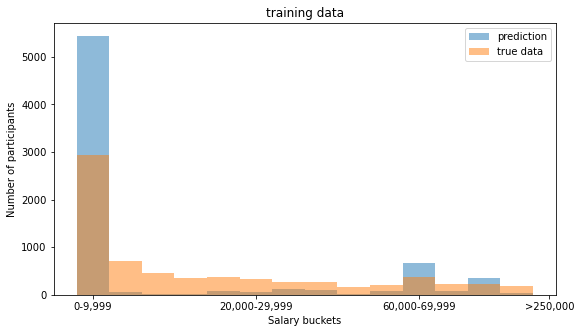

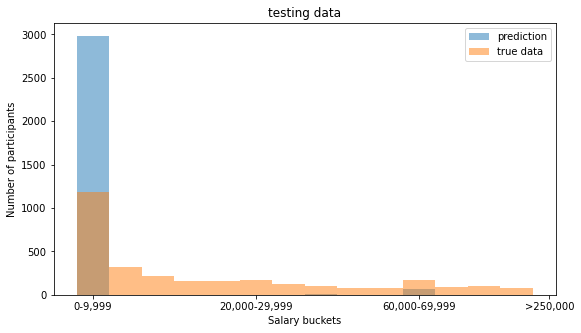

In [38]:
xtick = ['0-9,999', '20,000-29,999', '60,000-69,999', '>250,000']
plt.figure(figsize = (9,5))
plt.hist(prob_df["pred_encoded"], bins = range(0,15),alpha = 0.5, label = "prediction", align = "left")
plt.hist(prob_df["true_encoded"], bins = range(0,15),alpha = 0.5, label = "true data", align = "left")
plt.title("training data")
plt.legend()
plt.xlabel("Salary buckets")
plt.ylabel("Number of participants")
plt.xticks([0,5,10,14],xtick)
plt.show()

plt.figure(figsize = (9,5))
plt.hist(prob_df_test["pred_encoded"], bins = range(0,15),alpha = 0.5, label = "prediction", align = "left")
plt.hist(prob_df_test["true_encoded"], bins = range(0,15),alpha = 0.5, label = "true data", align = "left")
plt.title("testing data")
plt.legend()
plt.xlabel("Salary buckets")
plt.ylabel("Number of participants")
plt.xticks([0,5,10,14],xtick)
plt.show()
